# Análise Descritiva de Dados da PNAD 2015

## Importações

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import os

In [2]:
# Exibe as versões das bibliotecas importadas no ambiente de execução do Google Colab
print(f'Versão do pandas: {pd.__version__}')
print(f'Versão do numpy: {np.__version__}')
print(f'Versão do seaborn: {sns.__version__}')
print(f'Versão do scipy: {scipy.__version__}')

Versão do pandas: 1.5.3
Versão do numpy: 1.24.3
Versão do seaborn: 0.12.2
Versão do scipy: 1.10.1


## Conjunto de Dados do Projeto

A **Pesquisa Nacional por Amostra de Domicílios (PNAD)** investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Variáveis Utilizadas

*   **Renda**: rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.
*   **Idade**: idade do morador na data de referência em anos.
*   **Altura**: altura do morador em metros (elaboração própria).
*   **UF**: estado da federação
*   **Anos de Estudo**: anos de estudo do morador.
*   **Cor**: cor declarada pelo morador.



### Observações

Os seguintes tratamentos foram realizados nos dados originais da pesquisa:



1.   Forma eliminados os registros onde a renda inválida (999 999 999 999)
2.   Foram eliminados os registros onde a renda era missing
3.   Foram considerados somente os registros das pessoas de referência de cada domicílio (responsável pelo domicílio)



## Análise dos Dados

### Importação e Visualização dos Dados

In [3]:
# Cria um dataframe com os resultados da pesquisa
dados = pd.read_csv('dados.csv')

# Exibe as 10 primeiras linhas do dataframe recém-criado
dados.head(10)

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
5,11,1,34,8,12,790,1.637906
6,11,0,57,8,12,3150,1.570078
7,11,1,60,8,12,1700,1.608495
8,11,1,50,4,14,1800,1.780329
9,11,0,26,8,12,1150,1.793203


In [41]:
# Exibe a forma do dataframe
dados.shape

(76840, 7)


### Análise do Comportamento da Variável Renda

#### Classes de Renda


Já que a variável renda é quantitativa, vamos criar intervalos de renda nos quais os valores desta variável possam cair. Desta forma, poderemos construir uma tabela de frequências para determinar a quantidade de observações que pertencem a cada intervalo.

São estes os intervalos:



*   **A**: Acima de 25 SM
*   **B**: De 15 a 25 SM
*   **C**: De 5 a 15 SM
*   **D**: De 2 a 5 SM
*   **E**: Até 2 SM

Na época da pesquisa 1 salário mínimo (SM) valia R$ 788,00.

In [4]:
menor_salario = dados['Renda'].min()
maior_salario = dados['Renda'].max()

In [5]:
print(f'Menor salário: {menor_salario}', f'Maior salário: {maior_salario}', sep='\n')

Menor salário: 0
Maior salário: 200000


In [6]:
# Definição das classes de salários
classes = [menor_salario, 1576, 3940, 11820, 19700, maior_salario]
classes

[0, 1576, 3940, 11820, 19700, 200000]

In [7]:
# Rótulos para cada intervalo (classe de renda)
rotulos = list('EDCBA')
rotulos

['E', 'D', 'C', 'B', 'A']

In [8]:
# Cria uma Series do pandas, categorizando cada valor de renda
pd.cut(
    x=dados['Renda'],
    bins=classes,
    labels=rotulos,
    include_lowest=True
)

0        E
1        E
2        E
3        D
4        E
        ..
76835    E
76836    E
76837    E
76838    E
76839    E
Name: Renda, Length: 76840, dtype: category
Categories (5, object): ['E' < 'D' < 'C' < 'B' < 'A']

In [9]:
# Cria uma tabela de frequências absolutas das classes de renda
tabela_freq_absoluta = pd.value_counts(
    pd.cut(
        x=dados['Renda'],
        bins=classes,
        labels=rotulos,
        include_lowest=True
    ),
    sort=False
)
tabela_freq_absoluta

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

In [10]:
# Cria uma tabela de frequências relativas das classes de renda
tabela_freq_relativa = pd.value_counts(
    pd.cut(
        x=dados['Renda'],
        bins=classes,
        labels=rotulos,
        include_lowest=True
    ),
    sort=False,
    normalize=True
)
tabela_freq_relativa

E    0.647514
D    0.242087
C    0.094235
B    0.010698
A    0.005466
Name: Renda, dtype: float64

In [11]:
# Cria uma tabela com as distribuições de frequências
distribuicao_freq = pd.DataFrame(
    {
        'Freq Absoluta': tabela_freq_absoluta,
        'Freq Relativa (%)': tabela_freq_relativa * 100
    }
)
distribuicao_freq

,Freq Absoluta,Freq Relativa (%)
E,49755,64.751432
D,18602,24.208745
C,7241,9.423477
B,822,1.069755
A,420,0.546590


In [12]:
distribuicao_freq.rename_axis('Classe de Renda', axis=1, inplace=True)

In [13]:
distribuicao_freq.sort_index(axis= 0, ascending=True, inplace=True, key=lambda x: x.str.lower())

In [14]:
distribuicao_freq

Classe de Renda,Freq Absoluta,Freq Relativa (%)
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


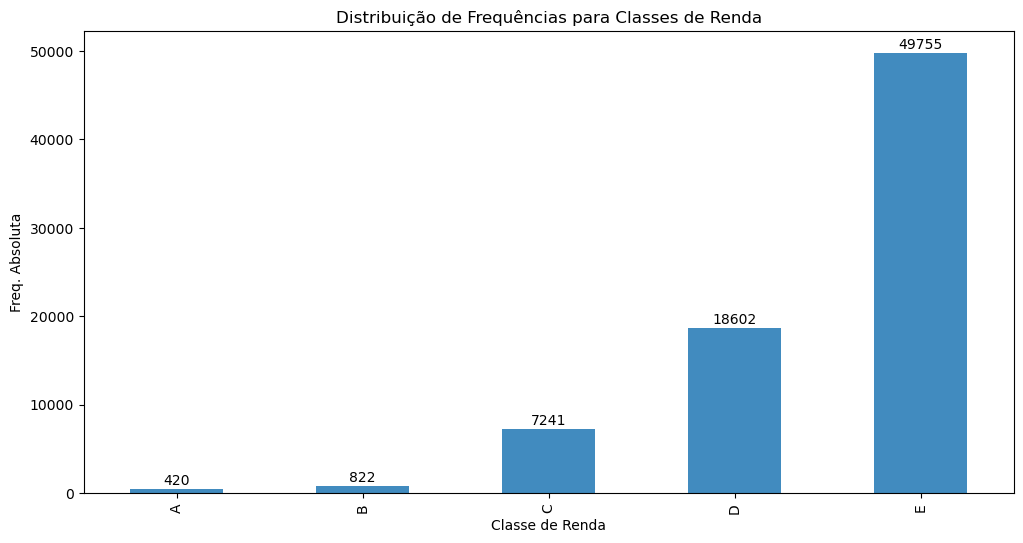

In [15]:
from matplotlib import pyplot as plt


def adicionar_rotulos_dados(x, y):
  """Adiciona rótulos de dados no gráfico"""
  for i in range(len(x)):
    plt.text(i, y[i] + 500, y[i], ha='center')


# Define o tamanho da figura
plt.figure(figsize=(12,6))

# Plota um gráfico de barras
distribuicao_freq['Freq Absoluta'].plot.bar(alpha=0.85)

# Adiciona os rótulos de dados
adicionar_rotulos_dados(x=distribuicao_freq.index, y=distribuicao_freq['Freq Absoluta'])

# Título do gráfico
plt.title('Distribuição de Frequências para Classes de Renda')

# Rótulo do eixo x
plt.xlabel('Classe de Renda')

# Rótulo do eixo y
plt.ylabel('Freq. Absoluta')

# Linha de grade
plt.grid(visible=False)

# Exibe a figura
plt.show()

#### Conclusões

A maioria das pessoas entrevistadas (64,75%) pertence à classe E, que é a das pessoas que ganham até 2 (dois) salários mínimos.

É possível observar que há uma quantidade descrescente de pessoas que percentem às classes subsequentes, o que indica que uma pequena parcela dos entrevistados ganham altos salários.

### Tabelas de Contingência para Sexo e Cor

In [16]:
# Dicionário com os significados dos códigos dos sexos
sexo = {
    0: 'Masculino',
    1: 'Feminino'
}

# Dicionário com os significados dos códigos das cores
cor = {
    0: 'Indígena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem declaração'
}

In [17]:
# Cria uma tabela de contingência de frequências absolutas
tabela_contingencia_sexo_cor = pd.crosstab(
    index=dados['Sexo'],
    columns=dados['Cor'],
    margins=True,
    margins_name='Total'
  )
tabela_contingencia_sexo_cor

Cor,0,2,4,6,8,Total
Sexo,,,,,,
0,256,22194,5502,235,25063,53250
1,101,9621,2889,117,10862,23590
Total,357,31815,8391,352,35925,76840


In [18]:
# Renomeia os índices e as colunas da tabela
tabela_contingencia_sexo_cor.rename(index=sexo, columns=cor, inplace=True)
tabela_contingencia_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda,Total
Sexo,,,,,,
Masculino,256,22194,5502,235,25063,53250
Feminino,101,9621,2889,117,10862,23590
Total,357,31815,8391,352,35925,76840


In [19]:
tabela_contingencia_relativa_sexo_cor = pd.crosstab(
    index=dados['Sexo'],
    columns=dados['Cor'],
    margins=True,
    margins_name='Total',
    normalize='all'
  )
tabela_contingencia_relativa_sexo_cor

Cor,0,2,4,6,8,Total
Sexo,,,,,,
0,0.003332,0.288834,0.071603,0.003058,0.326171,0.692998
1,0.001314,0.125208,0.037598,0.001523,0.141359,0.307002
Total,0.004646,0.414042,0.109201,0.004581,0.467530,1.000000


In [20]:
tabela_contingencia_relativa_sexo_cor.rename(index=sexo, columns=cor, inplace=True)
tabela_contingencia_relativa_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda,Total
Sexo,,,,,,
Masculino,0.003332,0.288834,0.071603,0.003058,0.326171,0.692998
Feminino,0.001314,0.125208,0.037598,0.001523,0.141359,0.307002
Total,0.004646,0.414042,0.109201,0.004581,0.467530,1.000000


#### Conclusões

A maior parte dos entrevistados (69,29%) eram homens, dos quais a maioria eram da cor parda (32,51%).

A maior parte dos entrevistados, incluindo homens e mulheres, eram pardos (46,75%).

### Medidas de Tendência Central e de Dispersão para a Renda

In [21]:
# Média da renda
renda_media = dados['Renda'].mean()
renda_media

2000.3831988547631

In [22]:
# Renda mediana
renda_mediana = dados['Renda'].median()
renda_mediana

1200.0

In [23]:
# Renda modal
renda_modal = dados['Renda'].mode()[0]
renda_modal

788

In [24]:
renda_media > renda_mediana > renda_modal

True

Como `renda_media > renda_mediana > renda_modal`, a distribuição da variável renda tem uma assimetria à direita, sugerindo que há uma concentração elevada de valores de renda baixos.

In [25]:
# Desvio absoluto média da renda
dam_renda = (dados['Renda'] - dados['Renda'].mean()).abs().mean()
dam_renda

1526.4951371638058

In [26]:
# Variância da renda
variancia_renda = dados['Renda'].var()
variancia_renda

11044906.00622118

In [27]:
# Desvio padrão da renda
desvio_padrao_renda = dados['Renda'].std()
desvio_padrao_renda

3323.3877303470294

In [28]:
tabela_contingencia_sexo_cor_renda = pd.crosstab(
    index=dados['Cor'],
    columns=dados['Sexo'],
    values=dados['Renda'],
    aggfunc=['mean', 'median', 'max'],
)
tabela_contingencia_sexo_cor_renda.rename(
    index=cor,
    columns={
        0: 'Masculino',
        1: 'Feminino',
        'mean': 'Média',
        'median': 'Mediana',
        'max': 'Máximo'
        }
    )

Média                Mediana             Máximo         
Sexo        Masculino     Feminino Masculino Feminino Masculino Feminino
Cor                                                                     
Indígena  1081.710938  2464.386139     797.5    788.0     10000   120000
Branca    2925.744435  2109.866750    1700.0   1200.0    200000   100000
Preta     1603.861687  1134.596400    1200.0    800.0     50000    23000
Amarela   4758.251064  3027.341880    2800.0   1500.0     50000    20000
Parda     1659.577425  1176.758516    1200.0    800.0    100000    30000

In [29]:
tabela_contingencia_sexo_cor_renda_dispersao = pd.crosstab(
    index=dados['Cor'],
    columns=dados['Sexo'],
    values=dados['Renda'],
    aggfunc=['std']
)
tabela_contingencia_sexo_cor_renda_dispersao.rename(
    index=cor,
    columns={
        0: 'Masculino',
        1: 'Feminino',
        'std': 'Desvio Padrão'
        },
    inplace=True
    )
tabela_contingencia_sexo_cor_renda_dispersao.round(2)

Desvio Padrão          
Sexo         Masculino  Feminino
Cor                             
Indígena       1204.09  11957.50
Branca         4750.79   3251.01
Preta          1936.31   1349.80
Amarela        5740.82   3731.17
Parda          2312.09   1596.23

#### Conclusões

No geral, os homens de todas as raças têm salários médios maiores que os das mulheres, exceto entre os indígenas. Esta exceção pode ser explicada por um registro de renda de R$120.000,00 entre as mulheres indígenas, o que deve ter elevado a renda média das mulheres indígenas.

Em termos de renda mediana, homens e mulheres amarelos têm os maiores salários, ao passo que os indígenas têm os menores salários.

O maior valor de renda (R$200.000,00) foi registrado para homens da cor branca.

Entre os homens, há maior dispersão nos valores de renda para os amarelos e menor dispersão para os indígenas.

Entre as mulheres, há maior dispersão nos valores de renda para as indígenas e menor dispersão para as pretas.

### Diagramas de Caixa para a Renda

<Axes: title={'center': 'Renda por Cor e Sexo'}, xlabel='Renda (R$)', ylabel='Cor'>

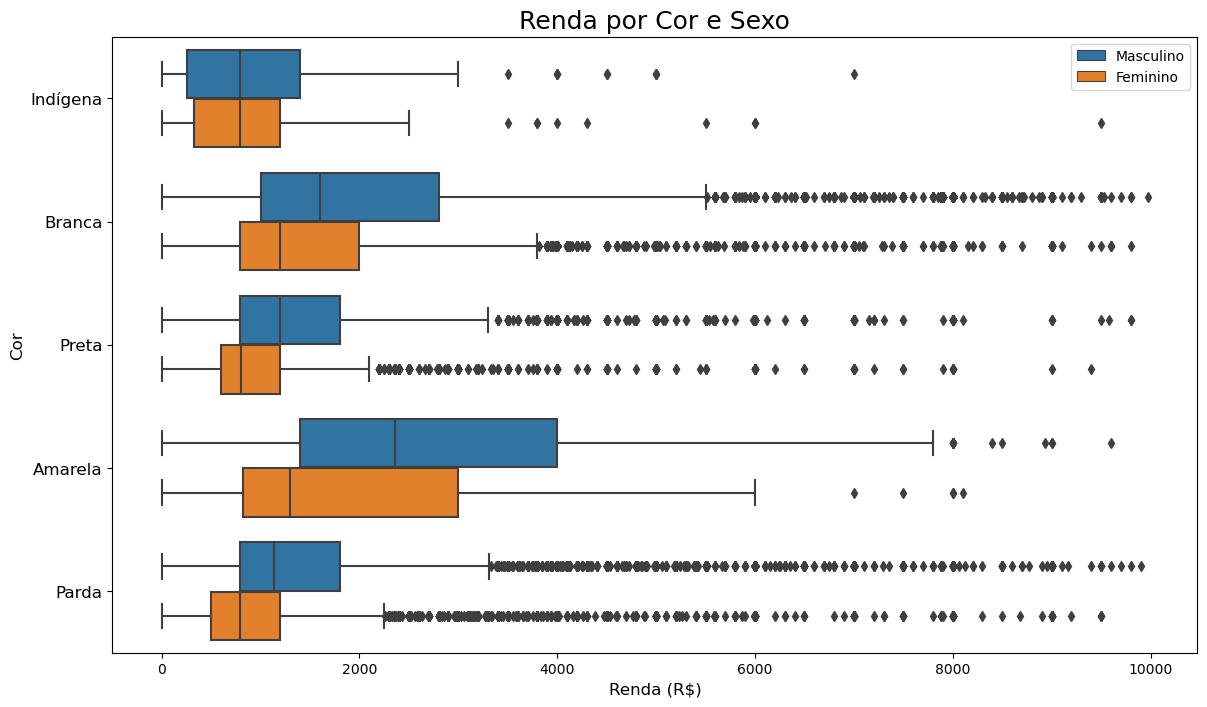

In [30]:
# Cria um diagrama de caixa (boxplot) para a variável renda
# Utiliza somente as observações em que a renda era inferior a R$ 10 mil
ax = sns.boxplot(
    data=dados.query('Renda < 10000'),
    x='Renda',
    y='Cor',
    hue='Sexo',
    orient='h'
  )

# Define as dimensões da figura
ax.figure.set_size_inches(14, 8)

# Define o título
ax.set_title('Renda por Cor e Sexo', fontsize=18)

# Define o título do eixo x
ax.set_xlabel('Renda (R$)', fontsize=12)

# Define o título do eixo y
ax.set_ylabel('Cor', fontsize=12)

# Muda os marcores do eixo y
ax.set_yticklabels(['Indígena', 'Branca', 'Preta', 'Amarela', 'Parda'], fontsize=12)

# Obtém os identificadores e os rótulos da legenda do gráfico
identificadores, rotulos = ax.get_legend_handles_labels()

# Configura a legenda do gráfico
ax.legend(handles=identificadores, labels=['Masculino', 'Feminino'])

# Exibe o gráfico
ax

#### Conclusões

Com este diagrama podemos notar que, no geral, a renda dos homens é superior a das mulheres.

Nota-se também que há maior dispersão nos valores de renda de homens e mulheres amarelos do que nos valores de renda de pessoas de outras raças.

### Análise de Percentis para a Variável Renda

In [31]:
# Series com os valores de renda para cada percentil
percentis_renda = dados['Renda'].quantile([i / 100 for i in range(1, 100)])
percentis_renda

0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
0.05      100.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 99, dtype: float64

In [32]:
# Qual é o percentual de entrevistados da PNAD 2015 que ganham até 1 (um) salário mínimo?
percentis_renda[percentis_renda <= 788]

0.01      0.0
0.02      0.0
0.03      0.0
0.04     50.0
0.05    100.0
0.06    180.0
0.07    200.0
0.08    280.0
0.09    300.0
0.10    350.0
0.11    400.0
0.12    400.0
0.13    480.0
0.14    500.0
0.15    500.0
0.16    600.0
0.17    600.0
0.18    700.0
0.19    700.0
0.20    788.0
0.21    788.0
0.22    788.0
0.23    788.0
0.24    788.0
0.25    788.0
0.26    788.0
0.27    788.0
0.28    788.0
Name: Renda, dtype: float64

Observa-se que 28% dos entrevistados ganhavam até 1 (um) salário mínimo, que era de R$788,00.

In [33]:
# Percentual de pessoas que ganham até R$788,00
scipy.stats.percentileofscore(dados['Renda'], score=788, kind='weak')

28.867777199375325

In [34]:
# Qual é o valor máximo ganho por 99% das pessoas do conjunto de dados?
percentis_renda.loc[0.99]

15000.0

### Análise da Variável Renda Segundo Anos de Estudo

In [35]:
# Dicionário com as traduções dos códigos para nos de estudo
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}

In [36]:
tabela_contingencia_anos_estudo_sexo_renda = pd.crosstab(
    index=dados['Anos de Estudo'],
    columns=dados['Sexo'],
    values=dados['Renda'],
    aggfunc=['mean', 'median', 'max', 'std']
)
tabela_contingencia_anos_estudo_sexo_renda.rename(
    index=anos_de_estudo,
    columns={
        0: 'Masculino',
        1: 'Feminnino',
        'mean': 'Média',
        'median': 'Mediana',
        'max': 'Máximo',
        'std': 'Desvio Padrão'
    },
    inplace=True
)
tabela_contingencia_anos_estudo_sexo_renda

Média                Mediana            \
Sexo                              Masculino    Feminnino Masculino Feminnino   
Anos de Estudo                                                                 
Sem instrução e menos de 1 ano   799.494638   516.201748       700       390   
1 ano                            895.629047   492.771987       788       400   
2 anos                           931.178986   529.911638       788       450   
3 anos                          1109.203862   546.853916       800       500   
4 anos                          1302.329283   704.279111      1000       788   
5 anos                          1338.653218   781.389776      1045       788   
6 anos                          1448.875419   833.732824      1200       788   
7 anos                          1465.497940   830.751004      1200       788   
8 anos                          1639.396667   933.615351      1300       800   
9 anos                          1508.038850   868.021700      1200       788   
10 anos                         1731.270847   925.919225      1218       800   
11 anos                         2117.060504  1286.790889      1500      1000   
12 anos                         2470.330776  1682.313725      1800      1200   
13 anos                         3195.099154  1911.730047      2400      1300   
14 anos                         3706.620269  2226.460457      2500      1600   
15 anos ou mais                 6134.279790  3899.513231      4000      2800   
Não determinados                1295.761905   798.174419      1200       788   

                                  Máximo           Desvio Padrão               
Sexo                           Masculino Feminnino     Masculino    Feminnino  
Anos de Estudo                                                                 
Sem instrução e menos de 1 ano     30000     10000   1023.904884   639.311534  
1 ano                              30000      2000   1331.950552   425.291842  
2 anos                             40000      4000   1435.173827   498.234168  
3 anos                             80000      3500   2143.800133   424.124446  
4 anos                             50000     10000   1419.821787   629.553397  
5 anos                             35000      8000   1484.650587   635.782641  
6 anos                             25000      6000   1476.628602   574.547028  
7 anos                             40000      9000   1419.708673   602.038029  
8 anos                             30000     18000   1515.583715   896.781213  
9 anos                             60000     20000   2137.664774   973.221652  
10 anos                            45000      6000   2078.609734   620.611907  
11 anos                           200000    100000   2676.538942  1819.040417  
12 anos                            30000    120000   2268.081538  4851.833513  
13 anos                            25000     20000   2797.116800  2053.789771  
14 anos                            50000     20000   3987.214974  2064.083336  
15 anos ou mais                   200000    100000   7447.613594  4212.770709  
Não determinados                    7000      3000    979.648745   459.985964

Observa-se que, no geral, a renda de pessoas com maior escolaridade tende a ser superior a das pessoas com menor escolaridade.

<Axes: title={'center': 'Boxplot da Renda por Anos de Estudo e Sexo'}, xlabel='Renda (R$)', ylabel='Anos de Estudo'>

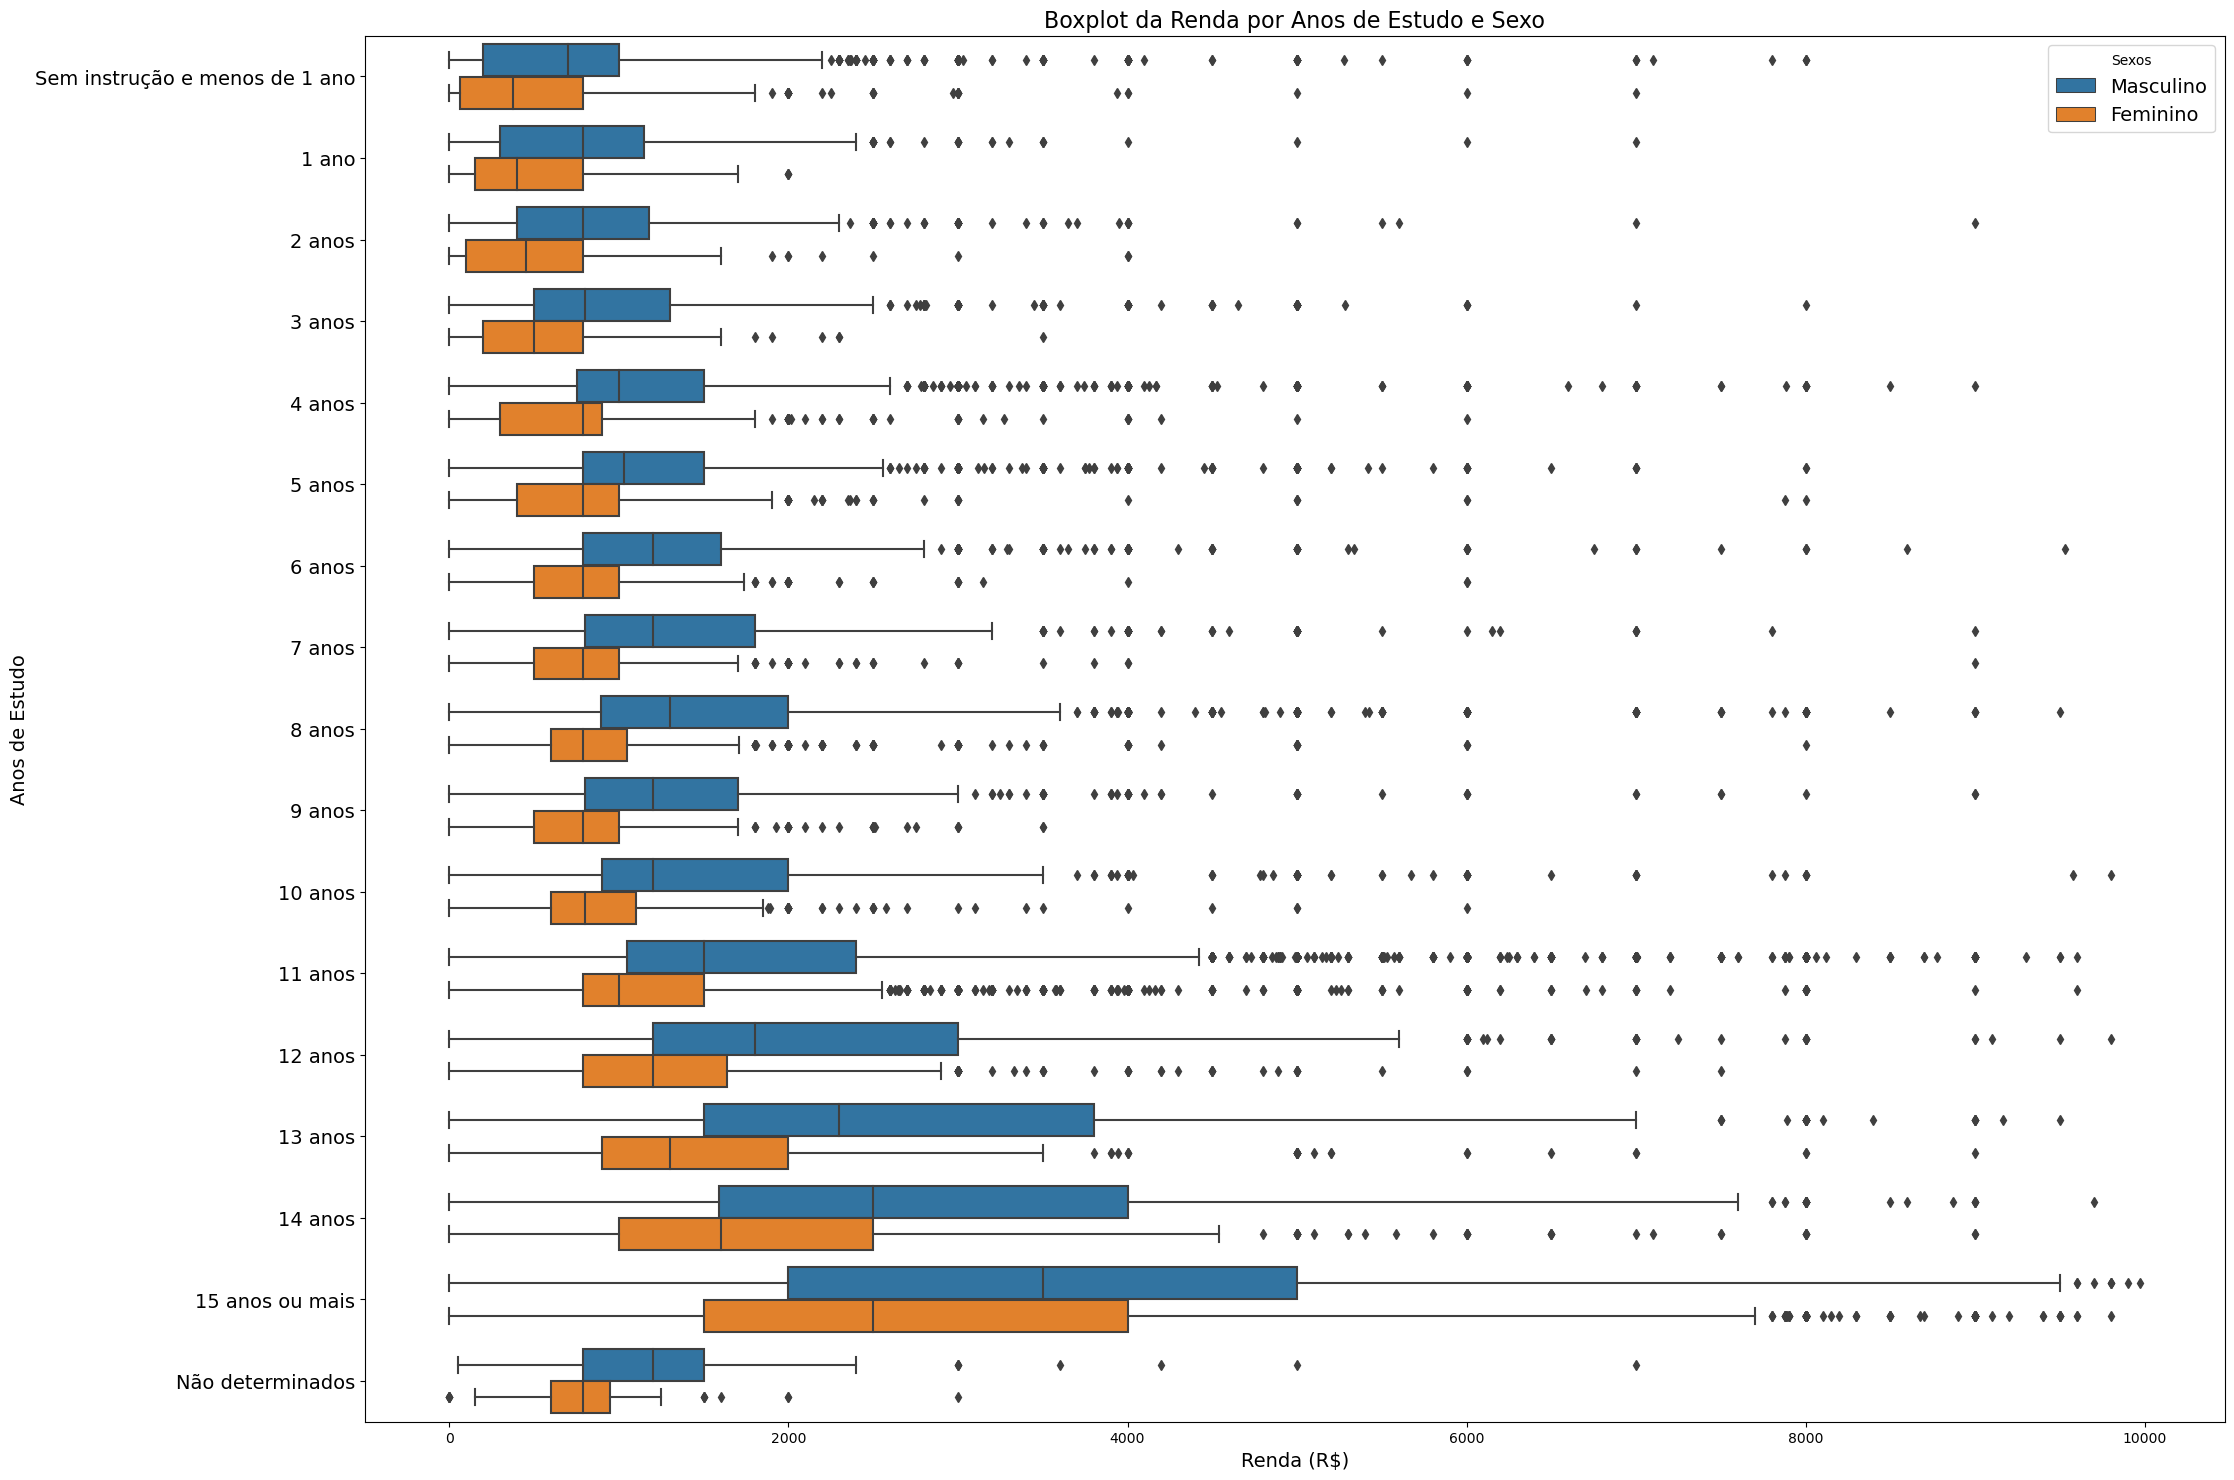

In [37]:
# Cria um diagrama de caixa
ax = sns.boxplot(
    data=dados.query('Renda < 10000'),
    x='Renda',
    y='Anos de Estudo',
    hue='Sexo',
    orient='h'
  )

# Define as dimensões da figura
ax.figure.set_size_inches(24,18)

# Define o título do gráfico
ax.set_title('Boxplot da Renda por Anos de Estudo e Sexo', fontsize=16)

# Define o rótulo do eixo x
ax.set_xlabel('Renda (R$)', fontsize=14)

# Define o rótulo do eixo y
ax.set_ylabel('Anos de Estudo', fontsize=14)

# Configura os rótulos dos marcadores do eixo y
ax.set_yticklabels([valor for valor in anos_de_estudo.values()], fontsize=14)

# Obtém os identificadores e os rótulos da legenda
identificadores, rotulos = ax.get_legend_handles_labels()

# Configura a legenda
ax.legend(title='Sexos', loc='upper right', handles=identificadores, labels=['Masculino', 'Feminino'], fontsize=14)

# Exibe o gráfico
ax

#### Conclusões

No geral, as pessoas com maior grau de escolaridade têm salários maiores.

Há diversas observações em que os homens com menor grau de escolaridade que as mulheres têm salários mais elevados.

### Análise da Variável Renda para Unidades da Federação

In [38]:
# Dicionário com as traduções dos códigos das UFs
ufs = {
    11: 'Rondônia',
    12: 'Acre',
    13: 'Amazonas',
    14: 'Roraima',
    15: 'Pará',
    16: 'Amapá',
    17: 'Tocantins',
    21: 'Maranhão',
    22: 'Piauí',
    23: 'Ceará',
    24: 'Rio Grande do Norte',
    25: 'Paraíba',
    26: 'Pernambuco',
    27: 'Alagoas',
    28: 'Sergipe',
    29: 'Bahia',
    31: 'Minas Gerais',
    32: 'Espírito Santo',
    33: 'Rio de Janeiro',
    35: 'São Paulo',
    41: 'Paraná',
    42: 'Santa Catarina',
    43: 'Rio Grande do Sul',
    50: 'Mato Grosso do Sul',
    51: 'Mato Grosso',
    52: 'Goiás',
    53: 'Distrito Federal'
}

In [39]:
renda_por_uf = dados.groupby('UF')['Renda'].agg(['mean', 'median', 'max', 'std'])
renda_por_uf.rename(
    index=ufs,
    columns={
        'mean': 'Média',
        'median': 'Mediana',
        'max': 'Máximo',
        'std': 'Desvio Padrão'
    },
    inplace=True
  )
renda_por_uf

,Média,Mediana,Máximo,Desvio Padrão
UF,,,,
Rondônia,1789.761223,1200.0,50000,2406.161161
Acre,1506.091782,900.0,30000,2276.233415
Amazonas,1445.130100,900.0,22000,1757.935591
Roraima,1783.588889,1000.0,20000,2079.659238
Pará,1399.076871,850.0,50000,2053.779555
Amapá,1861.353516,1200.0,15580,2020.688632
Tocantins,1771.094946,1000.0,60000,2934.590741
Maranhão,1019.432009,700.0,30000,1887.816905
Piauí,1074.550784,750.0,40000,2373.355726


As três Unidades da Federação (UFs) com maior salário mediano, em ordem crescente, são estas:



1.   Distrito Federal (2.000,00)
2.   Rio de Janeiro (1.800,00)
3.   São Paulo (1.600,00)

As três UFs com menor salário mediano, em ordem crescente, são estas:



1.   Maranhão (700,00)
2.   Piauí (750,00)
3.   Sergipe (788,00)

A UF com maior dispersão de valores de renda era o Distrito Federa, seguido pelo Rio de Janeiro e pelo Paraná.




<Axes: title={'center': 'Distribuição da Renda por UF'}, xlabel='Renda (R$)', ylabel='UF'>

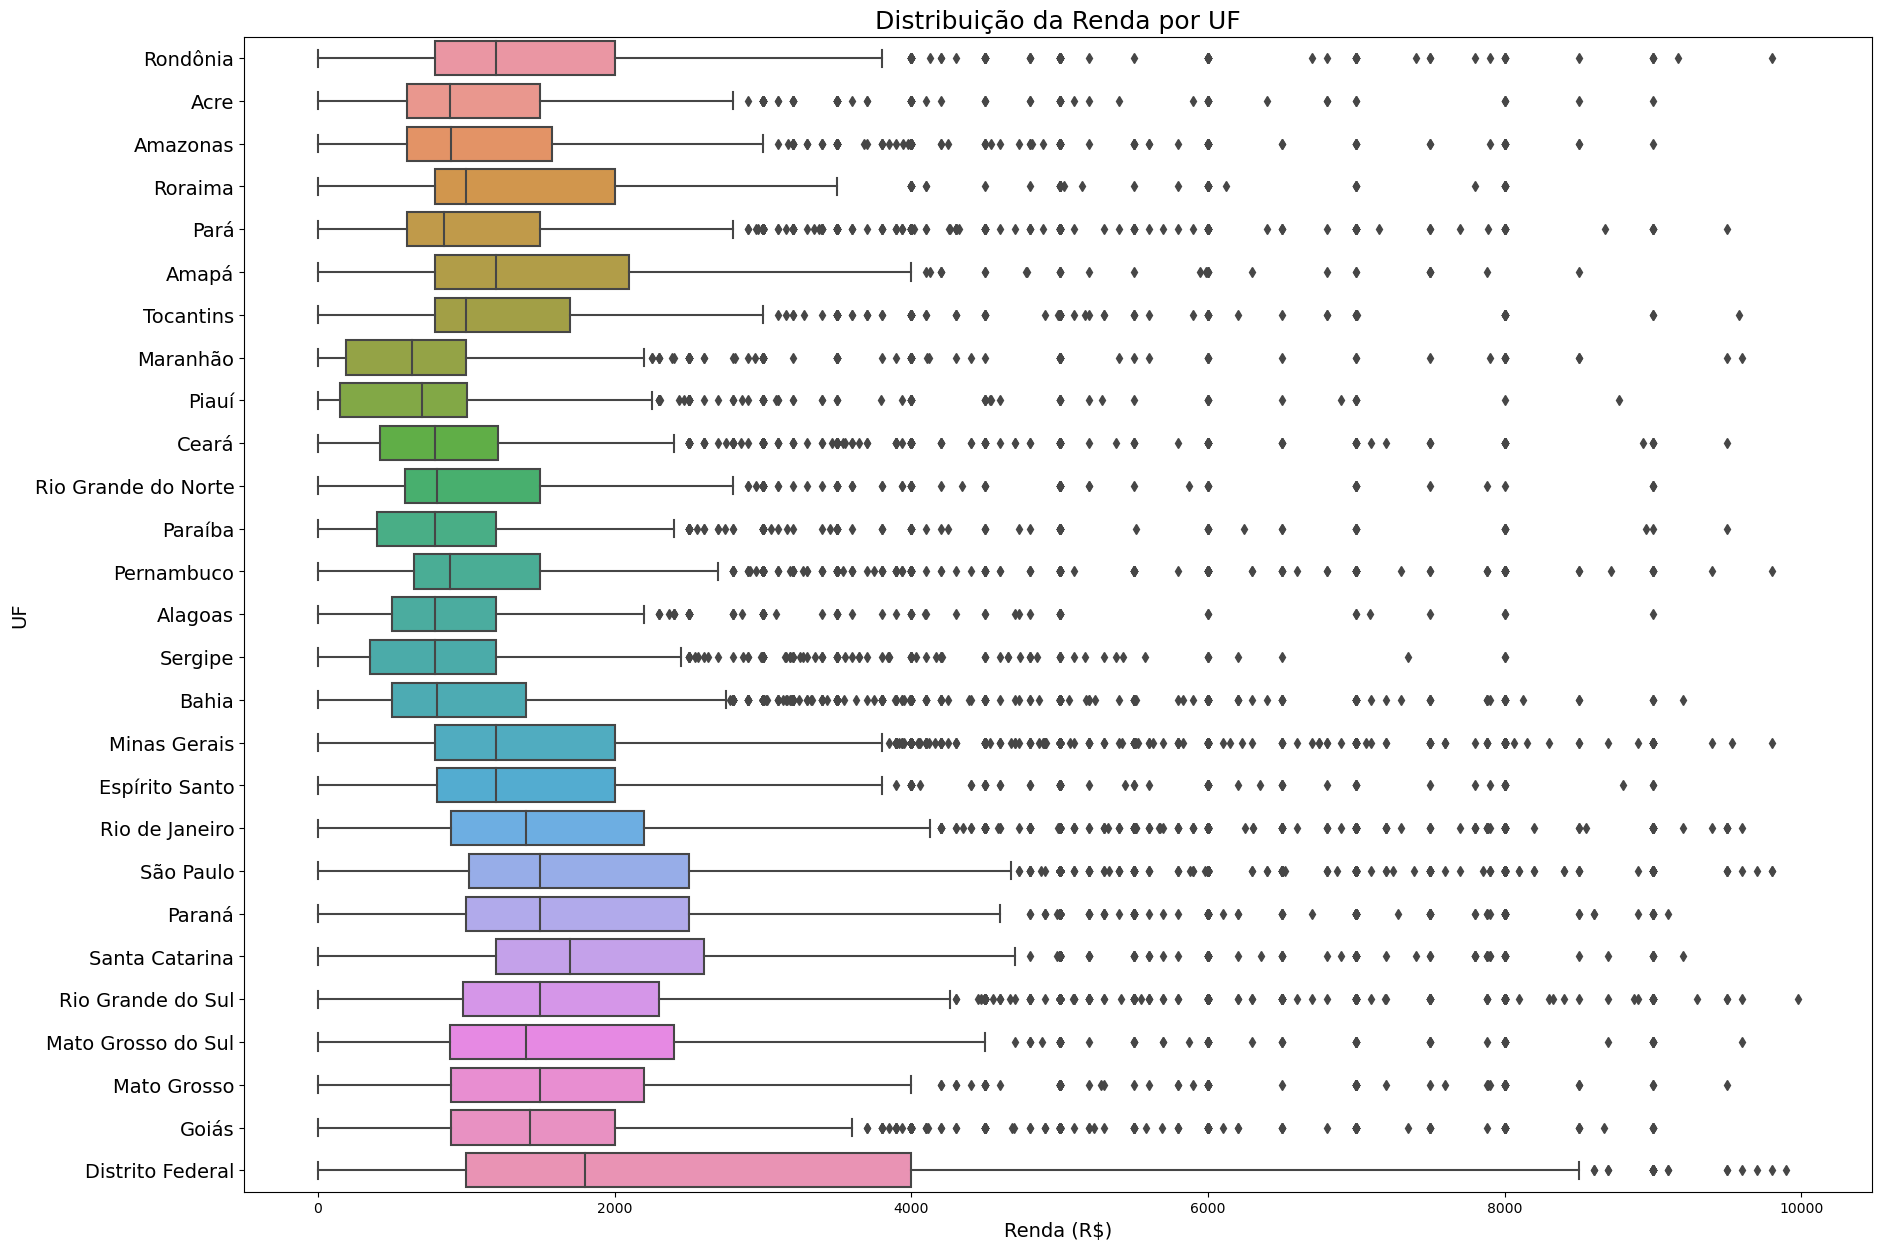

In [40]:
# Cria um boxplot para a variável renda versus a UF
ax = sns.boxplot(
    data=dados.query('Renda < 10000'),
    x='Renda',
    y='UF',
    orient='h'
  )

# Define as dimensões da figura
ax.figure.set_size_inches(21, 15)

# Define o rótulo do eixo x
ax.set_xlabel('Renda (R$)', fontsize=14)

# Define o rótulo do eixo y
ax.set_ylabel('UF', fontsize=14)

# Define os rótulos do eixo y
ax.set_yticklabels([uf for uf in ufs.values()], fontsize=14)

# Define o título do gráfico
ax.set_title('Distribuição da Renda por UF', fontsize=18)

# Exibe o gráfico
ax

Observa-se que os salários e a dispersão dos valores dos salários de entrevistados que moravam em estados das regiões sudeste, sul e centro-oeste eram superiores aos dos que moravam no norte e no nordeste.